<a href="https://colab.research.google.com/github/LeraDoroshenko/mn/blob/main/%D0%9B%D0%B0%D0%B15_%D0%94%D0%BE%D1%80%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE%D0%92_4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання 1.
Завантажити датасет Ірис. Роздрукувати перші 5 рядочків.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів.

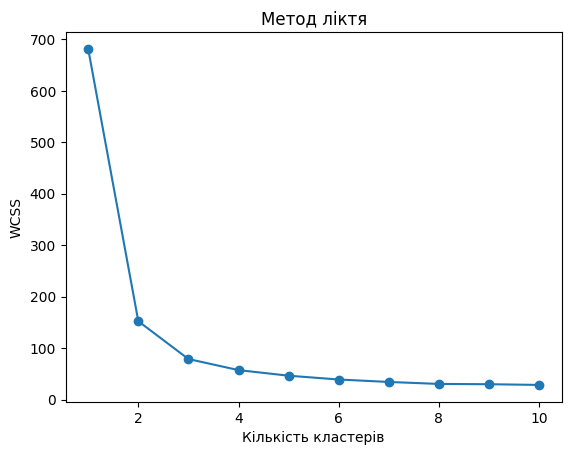

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(iris_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

In [3]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(iris_df)

    silhouette_avg = silhouette_score(iris_df, cluster_labels)
    print(f"Кількість кластерів: {n_clusters}, Середнє значення силуета: {silhouette_avg}")

Кількість кластерів: 2, Середнє значення силуета: 0.6810461692117462
Кількість кластерів: 3, Середнє значення силуета: 0.551191604619592
Кількість кластерів: 4, Середнє значення силуета: 0.49764331793219224
Кількість кластерів: 5, Середнє значення силуета: 0.4930804067193521
Кількість кластерів: 6, Середнє значення силуета: 0.36784649847122436
Кількість кластерів: 7, Середнє значення силуета: 0.3542978877198849
Кількість кластерів: 8, Середнє значення силуета: 0.34467972180561923
Кількість кластерів: 9, Середнє значення силуета: 0.31558878533897633
Кількість кластерів: 10, Середнє значення силуета: 0.3014143745325133


Візуалізувати кластери.

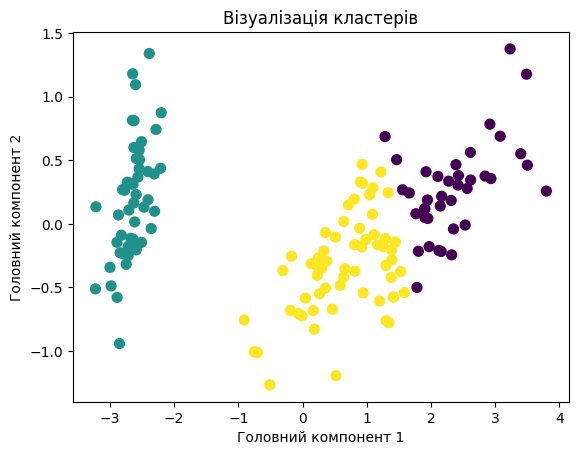

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_df)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(iris_pca)

plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Візуалізація кластерів')
plt.xlabel('Головний компонент 1')
plt.ylabel('Головний компонент 2')
plt.show()

Зробити висновки.

Висновки:
Виконавши всі пункти даного завдання та провівши аналіз, визначено оптимальну кількість кластерів - 3. Візуалізувавши кластери було доведено що алгоритм KMeans правильно розподіляє дані між кластерами.

Завдання 2.
Завантажити датасет
Реалізувати попередній аналіз даних:
Роздрукувати перші 5 рядків.

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/Student_data.csv'
data = pd.read_csv(file_path)

print("Перші 5 рядків датасету:")
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Перші 5 рядків датасету:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17        

Вивести розмір датасета, типи даних.

In [14]:
print("\nРозмір датасету:", data.shape)
print("\nТипи даних:")
print(data.dtypes)


Розмір датасету: (2392, 15)

Типи даних:
StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object


Перевірити на пропущені значення. При наявності замінити на середнє за стовпцем.

In [15]:
print("\nПеревірка на пропущені значення:")
print(data.isnull().sum())

data.fillna(data.mean(), inplace=True)


Перевірка на пропущені значення:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


Перевірити на дублікати. Якщо є – видалити. Вивести описову статистику.

In [16]:
print("\nПеревірка на дублікати:")
print(f"Кількість дублікатів: {data.duplicated().sum()}")

data.drop_duplicates(inplace=True)

print("\nОписова статистика:")
print(data.describe())


Перевірка на дублікати:
Кількість дублікатів: 0

Описова статистика:
         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
st

Побудувати 3 моделі на вибір для визначення оцінки. Підібрати оптимальні параметри.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

target = 'GradeClass'
X = data.drop(columns=target)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("\nLogistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log, zero_division=0))


Logistic Regression:
Accuracy: 0.697286012526096

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.28      0.27      0.27        49
         2.0       0.52      0.59      0.55        85
         3.0       0.62      0.51      0.56        86
         4.0       0.87      0.96      0.91       237

    accuracy                           0.70       479
   macro avg       0.46      0.46      0.46       479
weighted avg       0.66      0.70      0.68       479



In [19]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier:
Accuracy: 0.9123173277661796

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.45      0.61        22
         1.0       0.77      0.88      0.82        49
         2.0       0.89      0.87      0.88        85
         3.0       0.90      0.90      0.90        86
         4.0       0.96      0.98      0.97       237

    accuracy                           0.91       479
   macro avg       0.88      0.82      0.83       479
weighted avg       0.91      0.91      0.91       479



In [20]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_reg = rf_reg.predict(X_test)

print("\nRandom Forest Regression:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_reg)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_reg)}")


Random Forest Regression:
Mean Squared Error: 0.22688183716075158
R^2 Score: 0.848153562802637


Визначити методом ліктя і силуєтів оптимальну кількість кластерів.

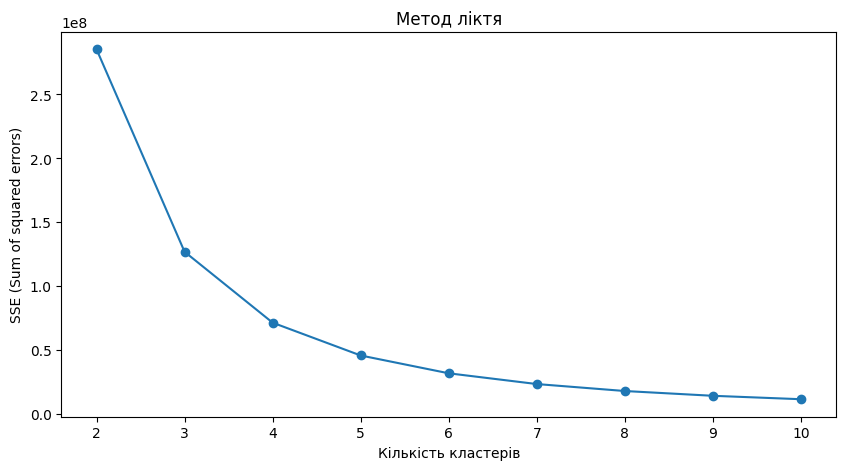

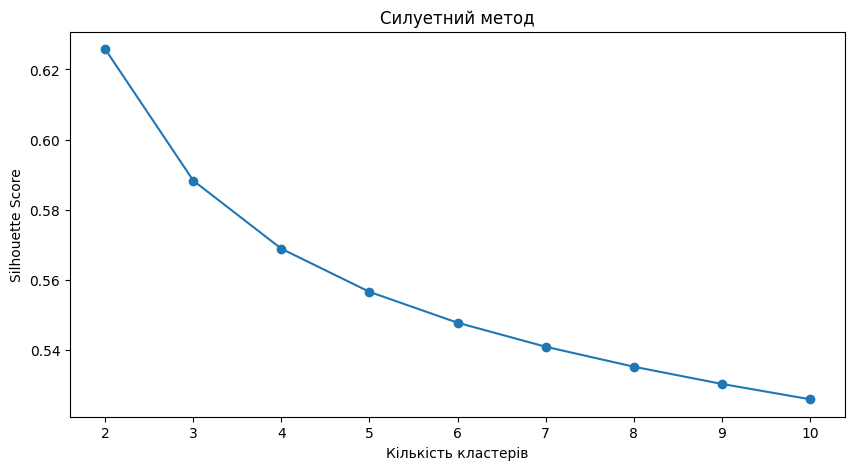

Оптимальна кількість кластерів: 2


In [21]:
sse = []
silhouette_scores = []
X_cluster = X
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sse, marker='o')
plt.title("Метод ліктя")
plt.xlabel("Кількість кластерів")
plt.ylabel("SSE (Sum of squared errors)")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Силуетний метод")
plt.xlabel("Кількість кластерів")
plt.ylabel("Silhouette Score")
plt.show()

optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Оптимальна кількість кластерів: {optimal_clusters}")

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

data['Cluster'] = clusters

Візуалізувати кластери.

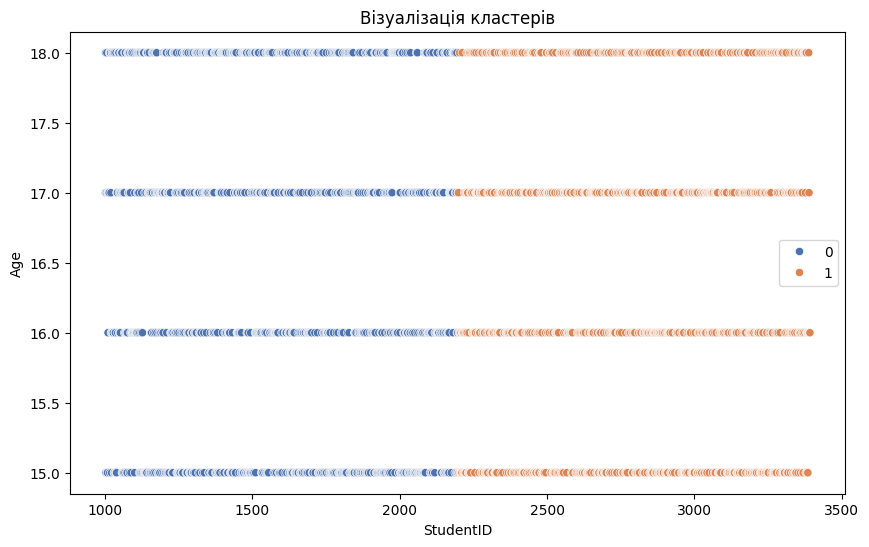

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_cluster.iloc[:, 0], y=X_cluster.iloc[:, 1], hue=clusters, palette="deep")
plt.title("Візуалізація кластерів")
plt.show()

Зробити висновки.

Висновки:
В ході виконання даного завдання було проаналізовано та підготовано дані, оброблені пропущенні значення та дублікати. Задача є класифікаційною, саме тому побудовані моделі класифікації, що дали можливість оцінити ефективність різних алгоритмів. Також було визначено найбільш точні моделі для вирішення задачі.
За допомогою кластеризації методами ліктя та силуетів, було виявлено що оптимально дані можна розділити на 3-4 кластери.